In [5]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import re 
import string
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
nlp = spacy.load("en_core_web_sm")

## Process
1. Data Cleaning
    remove URLS
    tags 
    Punctuation
    stopwords
    emojis
    lematization
    Steming
2. Word to vectors 
3. Count vectorizer
4. TF-IDF Vectorizer
5. Classifier Methods 
    - Random forest
    - KNN 
    - Max Entropy
    - Stochastic Gradient Descent
    - Multulayer perceptron
    - Naive Bayes
    - Multinomial Naive Bayes
    - Support vector machine
    - SailAil Sentiment Analyzer (http://sentistrength.wlv.ac.uk/Download)
6. Topic detection Techniques
    - LDA
    - Latent Semantic Analysis
    - non-negative Matrix Factorization
    - Probabilistic Latent semantic analysis
    - Pachinko Allocation Model
    





In [6]:
data =  pd.read_csv('data.csv')

## Data Cleaning For TF-IDF 

In [7]:
# remove punctuations & special characters & change to lowercase
data['Sentence'] = data['Sentence'].str.lower().str.replace('[^a-zA-Z\s]', '', regex=True)
data.head()

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,esi on lows down to bk a real possibility,negative
2,for the last quarter of componenta s net sal...,positive
3,according to the finnishrussian chamber of com...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


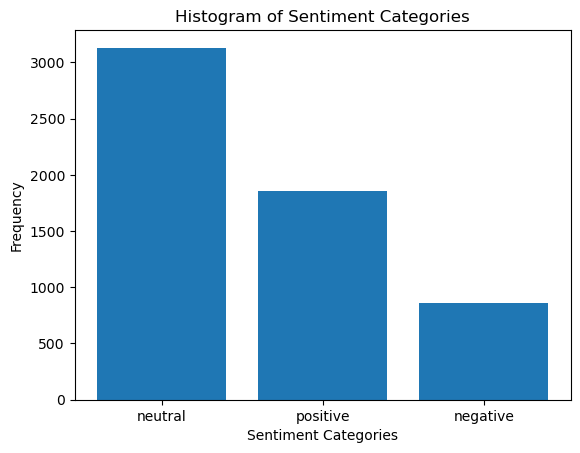

In [8]:
data['Sentiment'].value_counts()


# Your data
counts = data['Sentiment'].value_counts()

# Plotting the histogram
plt.bar(counts.index, counts.values)
plt.xlabel('Sentiment Categories')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Categories')
plt.show()

In [9]:
#convert data into tokens
data_words =  data.copy()
stemmer = nltk.PorterStemmer()
lemmatizer = nltk.WordNetLemmatizer()
data_words['Sentence'] = data_words['Sentence'].apply(lambda x: nlp(x))

In [10]:
def remove_stop_words(sentence):
    doc = nlp(sentence)  # Process the sentence using spaCy
    words = [token.text for token in doc if not token.is_stop]  # Filter out stop words
    return ' '.join(words)  # Join the remaining words into a sentence

In [11]:
data_words['Processed_Sentence'] = data_words['Sentence'].apply(remove_stop_words)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
words = data_words['Processed_Sentence'].tolist()
sentiments = data_words['Sentiment']
count_vectorizer = CountVectorizer()

# Term frequency
tf_matrix = count_vectorizer.fit_transform(words)
tf_matrix_array = tf_matrix.toarray()
feature_names = count_vectorizer.get_feature_names_out()

# TF IDF
tfidf_vec = TfidfVectorizer()
tfidf_mat = tfidf_vec.fit_transform(words)

In [13]:
tfidf_df = pd.DataFrame(tfidf_mat.toarray(), columns=tfidf_vec.get_feature_names_out())
tf_df = pd.DataFrame(tf_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

In [14]:
tfidf_df.shape

(5842, 10540)

In [15]:
tfidf_df

,aa,aal,aaland,aalto,aaltonen,aapl,aaron,aava,aazhang,ab,...,znga,zoltan,zone,zoo,zs,zsl,zte,zu,zurich,zxx
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# EDA

In [16]:
## Average number of characters on each twitt.
count = 0
add = 0
max = 0
min = len(data["Sentence"][0])

for row in data['Sentence']:
    add += len(row)
    count +=1
    if len(row) > max:
        max = len(row)
    if len(row) < min:
        min = len(row)

char_avg = add/count


print(f"promedio {char_avg}, maximo = {max}, minimo = {min}")

promedio 108.88325915782266, maximo = 298, minimo = 7


In [17]:
column_sums_tf_idf = np.sum(tfidf_df, axis=0)
column_sums_tf = np.sum(tf_df, axis=0)


In [18]:
column_sums_tf_idf.sort_values()

rangers       0.146375
hartford      0.146375
wolf          0.146375
women         0.146375
liberty       0.146375
               ...    
sales       108.312406
profit      115.064269
company     116.392155
mn          191.713959
eur         278.213080
Length: 10540, dtype: float64

In [19]:
print(column_sums_tf.sort_values())
frequency_count = (column_sums_tf == 1).sum()
frequency_count


aa                   1
marketsshire         1
marketsbp            1
marketresearch       1
marketplaces         1
                  ... 
sales              560
profit             568
company            809
mn                 815
eur               1627
Length: 10540, dtype: int64


5471

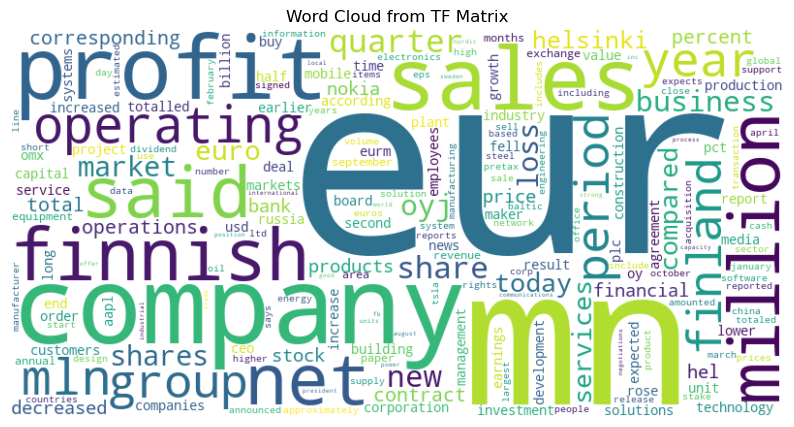

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Assuming tf_matrix is your TF matrix and feature_names is the list of words
# Replace these with your actual TF matrix and feature names

# Calculate the total frequency of each word across all documents
word_frequencies = np.asarray(tf_matrix.sum(axis=0)).ravel()
word_freq_dict = dict(zip(feature_names, word_frequencies))

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from TF Matrix')
plt.show()


# Data cleaning

In [21]:
# drop most repeted columns
tf_df.drop(['eur', 'mn', 'company'], axis=1, inplace=True)
tfidf_df.drop(['eur', 'mn', 'company'], axis=1, inplace=True)


/opt/homebrew/Caskroom/miniforge/base/envs/Data/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


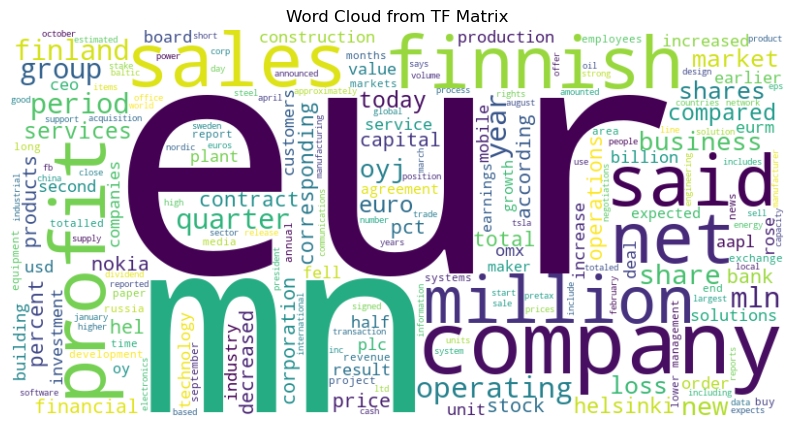

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Assuming tf_matrix is your TF matrix and feature_names is the list of words
# Replace these with your actual TF matrix and feature names

# Calculate the total frequency of each word across all documents
word_frequencies = np.asarray(tf_matrix.sum(axis=0)).ravel()
word_freq_dict = dict(zip(feature_names, word_frequencies))

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from TF Matrix')
plt.show()

# model 

# Gradient Boosting

In [22]:
from sklearn.ensemble import GradientBoostingClassifier as gbc
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(tf_df, sentiments, test_size=0.33, random_state=42)

# Model Training
gradient_boosting = gbc(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf = gradient_boosting.fit(X_train, y_train)

# Evaluate model
accuracy = clf.score(X_test, y_test)
print(accuracy)


0.683091286307054


In [23]:
training_score = clf.score(X_train, y_train)
testing_score =  clf.score(X_test,y_test )

print(f"train: {training_score}, test: {testing_score}")

train: 0.7498722534491569, test: 0.683091286307054


## random forest

In [24]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



X_train, X_test, y_train, y_test = train_test_split(tf_df, sentiments, test_size=0.33, random_state=42)



# Model Training
random_forest = rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
clf = random_forest.fit(X_train, y_train)

# Evaluate model
accuracy = clf.score(X_test, y_test)
print(accuracy)


0.6478215767634855


In [25]:
training_score = clf.score(X_train, y_train)
testing_score =  clf.score(X_test,y_test )

print(f"train: {training_score}, test: {testing_score}")

train: 0.9381706693919264, test: 0.6478215767634855


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('punkt')  # Download the punkt tokenizer

# Load your dataset (assuming it's in a CSV format)
df = words

# Combine text from different rows into a single string
combined_text = ' '.join(df['words'])  # 'text_column' is the column containing text

# Tokenize the combined text
words = word_tokenize(combined_text.lower())

# Calculate frequency distribution
freq_dist = FreqDist(words)

# Plotting the histogram
plt.figure(figsize=(12, 6))
plt.title('Word Frequency Histogram')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()
freq_dist.plot(50, cumulative=False)  # Plot the top 50 most frequent words, adjust as needed


[nltk_data] Downloading package punkt to /Users/ejo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


TypeError: list indices must be integers or slices, not str

In [ ]:

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import GradientBoostingClassifier as gbc
# from sklearn.model_selection import train_test_split
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import sklearn
import mlflow


with mlflow.start_run(nested=True):

    # Define an objective function to be maximized
    def objective(trial):

        classifier_name = trial.suggest_categorical('classifier', ['SVC', 'RandomForest', 'GradientBoosting'])

        if classifier_name == 'SVC':
            svc_c = trial.suggest_float('svc_c', 1e-10, 1e10, log=True)
            classifier_obj = sklearn.svm.SVC(C=svc_c, gamma='auto')
        elif classifier_name == 'RandomForest':
            rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=True)
            classifier_obj = sklearn.ensemble.RandomForestClassifier(max_depth=rf_max_depth, n_estimators=10)
        else:  # GradientBoosting
            gb_max_depth = trial.suggest_int('gb_max_depth', 2, 32, log=True)
            gb_learning_rate = trial.suggest_float('gb_learning_rate', 1e-3, 1.0, log=True)
            classifier_obj = sklearn.ensemble.GradientBoostingClassifier(max_depth=gb_max_depth, learning_rate=gb_learning_rate)

        # Split the data into training and validation sets
        X_train, X_val, y_train, y_val = train_test_split(tf_df, sentiments, test_size=0.2, random_state=42)

        #compare train and test words
        word_freq(X_train)
        print(X_train.shape)
        word_freq(X_test)
        print(X_test.shape)

        # Define hyperparameters to be optimized
        max_depth = trial.suggest_int('max_depth', 2, 32, log=True)

        # Initialize the RandomForestClassifier with suggested hyperparameters
        clf = RandomForestClassifier(max_depth=max_depth, n_estimators=100)

        # Train the classifier
        clf.fit(X_train, y_train)

        # Calculate accuracy on the validation set
        accuracy = clf.score(X_val, y_val)

        mlflow.log_params(trial.params)

        # Split the data into training and validation sets
        X_train, X_val, y_train, y_val = train_test_split(tf_df, sentiments, test_size=0.2, random_state=42)

        # Define hyperparameters to be optimized
        max_depth = trial.suggest_int('max_depth', 2, 32, log=True)

        # Initialize the RandomForestClassifier with suggested hyperparameters
        clf = RandomForestClassifier(max_depth=max_depth, n_estimators=100)

        # Train the classifier
        clf.fit(X_train, y_train)

        # Calculate accuracy on the validation set
        accuracy = clf.score(X_val, y_val)

        # Log the accuracy for the trial
        mlflow.log_metric('accuracy', accuracy)

        # Return the accuracy as the objective metric to be optimized
        return accuracy

    # Create a study object and optimize the objective function
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=250)

    # Get the best hyperparameters found during optimization
    best_params = study.best_params
    best_value = study.best_value

    # Log the best parameters and value
    mlflow.log_params(best_params)
    mlflow.log_metric('best_value', best_value)

    print(f"Best value: {best_value}")
    print(f"Best parameters: {best_params}")




## LDA

In [ ]:
from gensim.models import LdaModel
from gensim import corpora

# Convert your preprocessed text data to a list of tokenized sentences
tokenized_sentences = [sentence.split() for sentence in data_words['Processed_Sentence']]

# Create Dictionary from tokenized sentences
dictionary = corpora.Dictionary(tokenized_sentences)

# Create Corpus using the dictionary
corpus = [dictionary.doc2bow(text) for text in tokenized_sentences]

# Train the LDA model
num_topics = 3  # You can adjust the number of topics as needed
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Display Topics
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic {idx}: {topic}')

# Get Dominant Topic for Each Document
for i, text in enumerate(tokenized_sentences):
    bow = dictionary.doc2bow(text)
    print(f"Text {i+1}: {data_words['Sentence'].iloc[i]}")
    print(f"Dominant Topic: {lda_model.get_document_topics(bow)}")
    print("="*50)


Topic 0: 0.009*"s" + 0.006*"company" + 0.005*"new" + 0.005*"nokia" + 0.005*"said" + 0.004*"bank" + 0.004*"business" + 0.004*"aapl" + 0.003*"mobile" + 0.003*"buy"
Topic 1: 0.072*"eur" + 0.037*"mn" + 0.025*"profit" + 0.025*"sales" + 0.022*"net" + 0.021*"million" + 0.016*"operating" + 0.016*"mln" + 0.016*"m" + 0.015*"year"
Topic 2: 0.016*"s" + 0.016*"company" + 0.013*"finnish" + 0.011*"said" + 0.010*"finland" + 0.008*"oyj" + 0.007*"shares" + 0.006*"group" + 0.006*"helsinki" + 0.005*"new"
Text 1: the geosolutions technology will leverage benefon s gps solutions by providing location based search technology  a communities platform  location relevant multimedia content and a new and powerful commercial model 
Dominant Topic: [(0, 0.016054697), (1, 0.015762588), (2, 0.96818274)]
Text 2: esi on lows down  to  bk a real possibility
Dominant Topic: [(0, 0.5070028), (1, 0.42417893), (2, 0.06881833)]
Text 3: for the last quarter of   componenta s net sales doubled to eurm from eurm for the same pe

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Replace these with your LDA model and corpus
lda_model = lda_model  # Your trained LDA model
corpus = corpus  # Your corpus created using Gensim

# Prepare the visualization
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(vis_data)

/opt/homebrew/Caskroom/miniforge/base/envs/Data/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
